# Time Series Analysis

This Jupyterlab notebook contains homework 1 for the course [EDS 296](https://bren.ucsb.edu/courses/eds-296-1s), taught by Dr. Samantha Stevenson.

Author: Naomi Moraes

GitHub: https://github.com/nmoraescommit/time-series_hw.git

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake
import s3fs
import warnings
import pandas as pd
warnings.filterwarnings("ignore", message="Unable to decode time axis")

## Accessing CMIP6 AWS Catalog

### Locate monthly data for a historical time series

Locate monthly data for a historical simulation run with any two CMIP6 models of your
choice. For this assignment let's use 2 established models - CESM2 as well as GFDL-ESM4. We will focus on the climate variable surface air temperature (tas).

In [2]:
# Store CMIP6 data catalog as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

Let's see all the models we could use.

In [3]:
# Search through catalog, find all historical simulations
search = catalog.search(activity_id = "CMIP", experiment_id = "historical")

# Convert to a data frame
search_df = search.df

# Generate a list of model names to choose from
search_df.source_id.unique()

array(['GFDL-CM4', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'GISS-E2-1-G',
       'CNRM-CM6-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'CNRM-ESM2-1', 'MIROC6',
       'AWI-CM-1-1-MR', 'MRI-ESM2-0', 'CESM2-WACCM', 'CanESM5', 'CESM2',
       'SAM0-UNICON', 'GISS-E2-1-H', 'UKESM1-0-LL', 'EC-Earth3',
       'CanESM5-CanOE', 'INM-CM4-8', 'EC-Earth3-Veg', 'INM-CM5-0',
       'HadGEM3-GC31-LL', 'MPI-ESM-1-2-HAM', 'NESM3', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'E3SM-1-0', 'MCM-UA-1-0',
       'NorESM2-LM', 'GISS-E2-1-G-CC', 'FGOALS-g3', 'FGOALS-f3-L',
       'MIROC-ES2L', 'KACE-1-0-G', 'NorCPM1', 'CNRM-CM6-1-HR',
       'KIOST-ESM', 'NorESM2-MM', 'ACCESS-CM2', 'FIO-ESM-2-0',
       'ACCESS-ESM1-5', 'CESM2-FV2', 'CESM2-WACCM-FV2', 'GISS-E2-2-H',
       'E3SM-1-1', 'HadGEM3-GC31-MM', 'IITM-ESM', 'CIESM', 'E3SM-1-1-ECA',
       'AWI-ESM-1-1-LR', 'EC-Earth3-Veg-LR', 'TaiESM1', 'CAS-ESM2-0',
       'CMCC-CM2-SR5', 'EC-Earth3-AerChem', 'IPSL-CM5A2-INCA',
       'CMCC-CM2-HR4', 'EC-Earth3P-VHR', 'EC-Earth3

### Selecting model attributes

Now that we've narrowed down our models - let's see the unique member_ids.

In [4]:
# Search through catalog, store results in "search" variable
search_1 = catalog.search(activity_id= 'CMIP', experiment_id= 'historical', source_id = 'CESM2')
search_2 = catalog.search(activity_id= 'CMIP', experiment_id= 'historical', source_id = 'GFDL-ESM4')

# Display data frame associated with results
search_1_df = search_1.df
search_2_df = search_2.df

In [16]:
# search_1_df.member_id.unique() # Uncomment to view

array(['r10i1p1f1'], dtype=object)

In [6]:
# search_2_df.member_id.unique() # Uncomment to view

The member_ids I'd like to use for both is r10i1p1f1 and r1i1p1f1, for the CESM2 and GFDL-ESM4 models respectively. (I had to iteratively look at several combinations of member_ids - and found these to be sufficient.)

In [7]:
# Search through catalog, store results in "search" variable
search_1 = catalog.search(activity_id= 'CMIP', experiment_id= 'historical', source_id = 'CESM2', member_id = 'r10i1p1f1')
search_2 = catalog.search(activity_id= 'CMIP', experiment_id= 'historical', source_id = 'GFDL-ESM4', member_id = 'r1i1p1f1')

In [15]:
# search_1_df.variable_id.unique() # Uncommet to view

array(['tas'], dtype=object)

In [9]:
#search_2_df.variable_id.unique() # Uncomment to view

I'll use the variable 'tas' for each model - meaning surface air temperature. Finally, let's look at the table ids we would like to select.

In [10]:
# Display data frame associated with results
# search_1_df.table_id.unique() # Uncomment to view

In [11]:
# search_2_df.table_id.unique() # Uncomment to view

Here we can see that attributes are the same except for source_id.

In [12]:
# Finalize attributes
search_1 = catalog.search(activity_id= 'CMIP', 
                          experiment_id= 'historical', 
                          source_id = 'CESM2', 
                          member_id = 'r10i1p1f1', 
                          variable_id = 'tas', 
                          table_id = 'Amon')

search_2 = catalog.search(activity_id= 'CMIP', 
                          experiment_id= 'historical', 
                          source_id = 'GFDL-ESM4', 
                          member_id = 'r1i1p1f1', 
                          variable_id = 'tas', 
                          table_id = 'Amon')

# Display data frame associated with results
search_1_df = search_1.df
search_2_df = search_2.df

In [13]:
search_1_df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313


In [14]:
search_2_df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726


### Locate Corresponding Future Projection Data

Write Python code, to access via the cloud, data from the historical simulation, as well as corresponding future projection information for two different future emissions scenarios, for each model. For both the selected models I'll be using the SSPs 'ssp126' and 'ssp585'.

In [17]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id_1 = ["CESM2"]
source_id_2 = ['GFDL-ESM4']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = ['r10i1p1f1',  'r1i1p1f1']

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = "Amon"

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = "tas"

In [18]:
# Search through catalog, store results in  variable
future_1 = catalog.search(activity_id=activity_ids, source_id=source_id_1, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

future_2 = catalog.search(activity_id=activity_ids, source_id=source_id_2, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)
# Save as df
future_1_df = future_1.df
future_2_df = future_2.df

In [19]:
future_1_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190313
2,ScenarioMIP,NCAR,CESM2,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
3,ScenarioMIP,NCAR,CESM2,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
4,ScenarioMIP,NCAR,CESM2,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
5,ScenarioMIP,NCAR,CESM2,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


In [20]:
future_2_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp370,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
2,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
3,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
4,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Amon,tas,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20190726


**For model: CESM2**

In [21]:
# Extract data for the historical period, store as a separate xarray Dataset
hist_data_1 = xr.open_zarr(future_1.df['zstore'][1], storage_options={'anon': True})

# Extract data for an SSP 
ssp126_data_1 = xr.open_zarr(future_1.df['zstore'][3], storage_options={'anon': True})

# Extract data for an SSP 
ssp585_data_1 = xr.open_zarr(future_1.df['zstore'][5], storage_options={'anon': True})

**For model: CanESM**

In [22]:
# Extract data for the historical period, store as a separate xarray Dataset
hist_data_2 = xr.open_zarr(future_2.df['zstore'][4], storage_options={'anon': True})

# Extract data for an SSP 
ssp126_data_2 = xr.open_zarr(future_2.df['zstore'][2], storage_options={'anon': True})

# Extract data for an SSP 
ssp585_data_2 = xr.open_zarr(future_2.df['zstore'][3], storage_options={'anon': True})

### Create Time Series

 Read in the surface air temperature datasets from 1 and 2, and create annually averaged,
area-weighted, regionally averaged time series for your region of interest.

#### Region of Interest

The region I'm interested in is the Bay Area - as that's where I'm from! Fremont, California (my hometown) is located in the Bay Area - on the coast of the mid-point of California. It's has rather moderate temperatures and mild weather, but can contain many micro-climates (e.g. fog in San Francisco - to intense heat in San Jose). It's quite urbanized, in the areas near the coase, but contains farmland and natural parks further inland.

In [23]:
# Concatenate historical and future projection data
time_series_1 = xr.concat([hist_data_1, ssp126_data_1], dim="time")
time_series_2 = xr.concat([hist_data_1, ssp585_data_1], dim="time")
time_series_3 = xr.concat([hist_data_2, ssp126_data_2], dim="time")
time_series_4 = xr.concat([hist_data_2, ssp585_data_2], dim="time")

In [24]:
# Define min/max bounds for region of interest 
lat_min, lat_max = 37.0, 38.5 
lon_min, lon_max = 236.5, 238.0 

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
lat_1 = (time_series_1.lat >= lat_min) & (time_series_1.lat <= lat_max)
lon_1 = (time_series_1.lon >= lon_min) & (time_series_1.lon <= lon_max)

lat_2 = (time_series_2.lat >= lat_min) & (time_series_2.lat <= lat_max)
lon_2 = (time_series_2.lon >= lon_min) & (time_series_2.lon <= lon_max)

lat_3 = (time_series_3.lat >= lat_min) & (time_series_3.lat <= lat_max)
lon_3 = (time_series_3.lon >= lon_min) & (time_series_3.lon <= lon_max)

lat_4 = (time_series_4.lat >= lat_min) & (time_series_4.lat <= lat_max)
lon_4 = (time_series_4.lon >= lon_min) & (time_series_4.lon <= lon_max)

In [25]:
# Find points where the mask value is True, drop all other points
BayArea_1 = time_series_1.where(lat_1 & lon_1, drop=True)
BayArea_2 = time_series_2.where(lat_2 & lon_2, drop=True)
BayArea_3 = time_series_3.where(lat_3 & lon_3, drop=True)
BayArea_4 = time_series_4.where(lat_4 & lon_4, drop=True)

In [26]:
# Extract the tas variable, store as xarray DataArray and convert units to Celsius
temp_data_1 = BayArea_1.tas - 273.15
temp_data_2 = BayArea_2.tas - 273.15
temp_data_3 = BayArea_3.tas - 273.15
temp_data_4 = BayArea_4.tas - 273.15

In [27]:
# Define function to generate area weights
def weights(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [28]:
# Apply weighted function
weighted_temp_1 = weights(temp_data_1)
weighted_temp_2 = weights(temp_data_2)
weighted_temp_3 = weights(temp_data_3)
weighted_temp_4 = weights(temp_data_4)

In [29]:
# Calculate global weighted average
weighted_BayArea_temp_1 = weighted_temp_1.mean(dim=['lat', 'lon'])
weighted_BayArea_temp_2 = weighted_temp_2.mean(dim=['lat', 'lon'])
weighted_BayArea_temp_3 = weighted_temp_3.mean(dim=['lat', 'lon'])
weighted_BayArea_temp_4 = weighted_temp_4.mean(dim=['lat', 'lon'])

In [30]:
# Calculate annual average
yearly_weighted_BayArea_temp_1 = weighted_BayArea_temp_1.groupby('time.year').mean()
yearly_weighted_BayArea_temp_2 = weighted_BayArea_temp_2.groupby('time.year').mean()
yearly_weighted_BayArea_temp_3 = weighted_BayArea_temp_3.groupby('time.year').mean()
yearly_weighted_BayArea_temp_4 = weighted_BayArea_temp_4.groupby('time.year').mean()

### Trend Lines

We need to create trend lines for the historical (1850 - 2015) and historical + future (1850 - 2100) periods. 

##### Historical trend lines

In [31]:
# Create slices of your data 
hist_1 = yearly_weighted_BayArea_temp_1.sel(year=slice('1850','2015'))
hist_2 = yearly_weighted_BayArea_temp_2.sel(year=slice('1850','2015'))
hist_3 = yearly_weighted_BayArea_temp_3.sel(year=slice('1850','2015'))
hist_4 = yearly_weighted_BayArea_temp_4.sel(year=slice('1850','2015'))

In [32]:
# Extract the temperature values from your DataArrays
x_hist_1 = np.polyfit(hist_1.year.values, hist_1.values, 1)
x_hist_2 = np.polyfit(hist_2.year.values, hist_2.values, 1)
x_hist_3 = np.polyfit(hist_3.year.values, hist_3.values, 1)
x_hist_4 = np.polyfit(hist_4.year.values, hist_4.values, 1)

In [33]:
# Generate polynomial objects
trend_line_hist_1 = np.poly1d(x_hist_1)
trend_line_hist_2 = np.poly1d(x_hist_2)
trend_line_hist_3 = np.poly1d(x_hist_3)
trend_line_hist_4 = np.poly1d(x_hist_4)

##### Historical + Future trend lines

In [34]:
# Calculate best-fit parameters for the linear polynomial fit of temperature to year
x_1 = np.polyfit(yearly_weighted_BayArea_temp_1.year, yearly_weighted_BayArea_temp_1, 1)

In [35]:
x_2 = np.polyfit(yearly_weighted_BayArea_temp_2.year, yearly_weighted_BayArea_temp_2, 1)
x_3 = np.polyfit(yearly_weighted_BayArea_temp_3.year, yearly_weighted_BayArea_temp_3, 1)
x_4 = np.polyfit(yearly_weighted_BayArea_temp_4.year, yearly_weighted_BayArea_temp_4, 1)

In [36]:
# Generate a polynomial object using those best-fit parameters
trend_line_1 = np.poly1d(x_1) 

In [37]:
trend_line_2 = np.poly1d(x_2) 
trend_line_3 = np.poly1d(x_3) 
trend_line_4 = np.poly1d(x_4) 

### Plot!

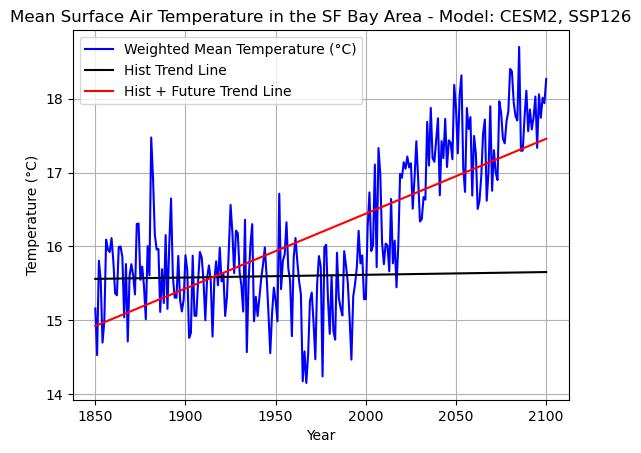

In [38]:
plt.figure()
plt.plot(yearly_weighted_BayArea_temp_1.year, yearly_weighted_BayArea_temp_1, label='Weighted Mean Temperature (°C)', color='blue')
plt.plot(yearly_weighted_BayArea_temp_1.year, trend_line_hist_1(yearly_weighted_BayArea_temp_1.year), color='black', label=f'Hist Trend Line')
plt.plot(yearly_weighted_BayArea_temp_1.year, trend_line_1(yearly_weighted_BayArea_temp_1.year), color='red', label=f'Hist + Future Trend Line')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Surface Air Temperature in the SF Bay Area - Model: CESM2, SSP126')

plt.legend()
plt.grid()
plt.show()

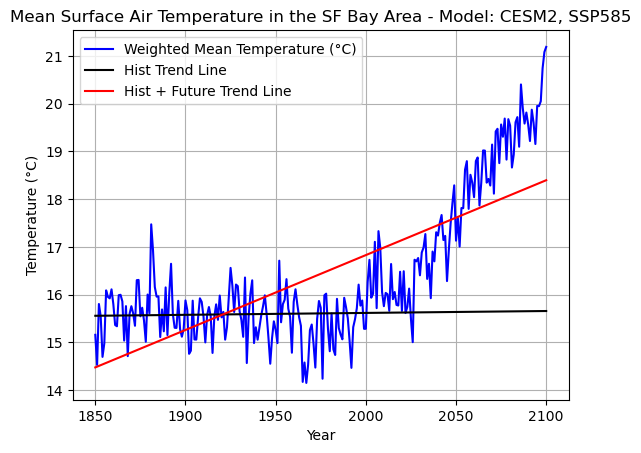

In [39]:
plt.figure()
plt.plot(yearly_weighted_BayArea_temp_2.year, yearly_weighted_BayArea_temp_2, label='Weighted Mean Temperature (°C)', color='blue')
plt.plot(yearly_weighted_BayArea_temp_2.year, trend_line_hist_2(yearly_weighted_BayArea_temp_2.year), color='black', label='Hist Trend Line')
plt.plot(yearly_weighted_BayArea_temp_2.year, trend_line_2(yearly_weighted_BayArea_temp_2.year), color='red', label= 'Hist + Future Trend Line')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Surface Air Temperature in the SF Bay Area - Model: CESM2, SSP585')

plt.legend()
plt.grid()
plt.show()

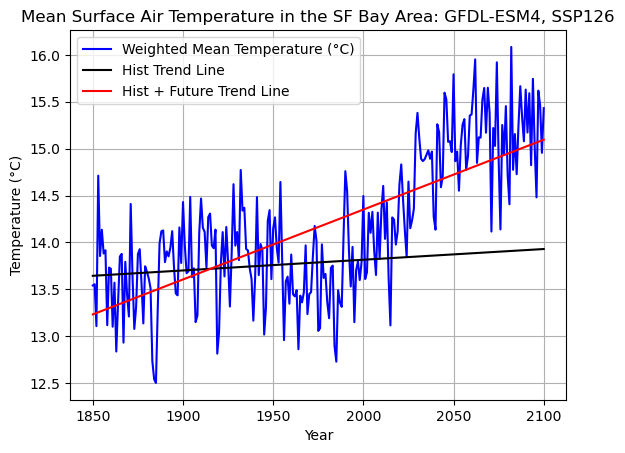

In [42]:
plt.figure()
plt.plot(yearly_weighted_BayArea_temp_3.year, yearly_weighted_BayArea_temp_3, label='Weighted Mean Temperature (°C)', color='blue')
plt.plot(yearly_weighted_BayArea_temp_3.year, trend_line_hist_3(yearly_weighted_BayArea_temp_3.year), color='black', label='Hist Trend Line')
plt.plot(yearly_weighted_BayArea_temp_3.year, trend_line_3(yearly_weighted_BayArea_temp_3.year), color='red', label='Hist + Future Trend Line')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Surface Air Temperature in the SF Bay Area: GFDL-ESM4, SSP126')

plt.legend()
plt.grid()
plt.show()

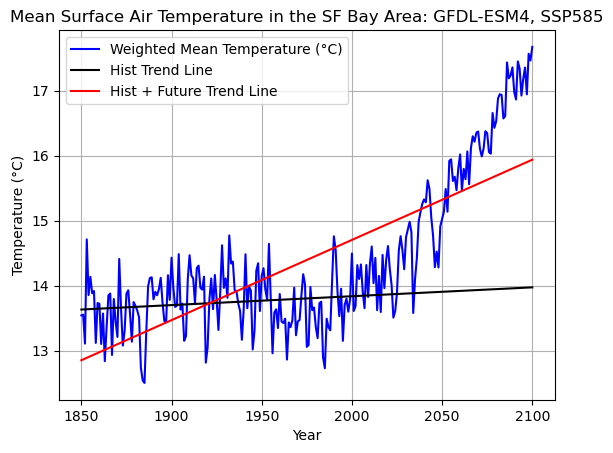

In [43]:
plt.figure()
plt.plot(yearly_weighted_BayArea_temp_4.year, yearly_weighted_BayArea_temp_4, label='Weighted Mean Temperature (°C)', color='blue')
plt.plot(yearly_weighted_BayArea_temp_4.year, trend_line_hist_4(yearly_weighted_BayArea_temp_4.year), color='black', label=f'Hist Trend Line')
plt.plot(yearly_weighted_BayArea_temp_4.year, trend_line_4(yearly_weighted_BayArea_temp_4.year), color='red', label=f'Hist + Future Trend Line')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Surface Air Temperature in the SF Bay Area: GFDL-ESM4, SSP585')

plt.legend()
plt.grid()
plt.show()

For all the above 4 plots - we can see that the surface air temperature - in both models for the 2 future scenarios of SSP126 and SSP58 - is on an upward trend. For the CESM2 model - for the second scenario, the curve is has a more consistnently exponential increase whereas there is some variation in the second plot. (This pattern is also seen in the GFDL-ESM4 model. ) This will have devastating impacts on the Bay Area populations as well environmental systems. (For example loss of habitat and biodiversity - which may impact agricultural yield. Increasing heat waves can also cause negative health impacts to vunerable populations.) The slopes of the hist + future trend is steeper for all scenarios.